# 4.10 Coding Etiquette & Excel Reporting

### This script contains the following points:
#### 1. Import libraries and dataframe
#### 2. Visualization for customer profiling

#### 1. Import libraries and dataframe

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Defining path and import dataframe (sample)
path = r'C:\Users\olilo\OneDrive\Dokumente\CF\Data Analytics Immersion_Week 8-12\2023-08-28 Instacart Basket Analysis'
sample_cust_profiling = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'cust_prof_dep_groups.pkl'))
sample_small = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'small_sample.pkl'))

In [8]:
# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [9]:
# Output check
sample_cust_profiling.shape

(9721098, 17)

In [10]:
sample_cust_profiling.head()

,department_id,department,order_id,user_id,order_number,prices,orders_day_of_week,order_hour_of_day,age_group,income_group,dependants_number,fam_status,gender,region,dependants_status,order_hour_of_day_group,day
0,1,frozen,86918,19,9,10.6,5,16,old adults,high income,1,married,Female,3 South,married female without dependents,afternoon,Thursday
1,1,frozen,1321974,19,1,5.2,6,13,old adults,high income,1,married,Female,3 South,married female without dependents,afternoon,Friday
2,1,frozen,2293453,19,2,5.2,5,14,old adults,high income,1,married,Female,3 South,married female without dependents,afternoon,Thursday
3,1,frozen,2293453,19,2,1.1,5,14,old adults,high income,1,married,Female,3 South,married female without dependents,afternoon,Thursday
4,1,frozen,2208892,19,3,1.1,0,14,old adults,high income,1,married,Female,3 South,married female without dependents,afternoon,Saturday


In [11]:
# Output check
sample_small.shape

(9721098, 35)

In [12]:
sample_small.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,Spending_flag,median_days_order,frequency_flag,name,surname,gender,state,age,date_joined,dependants_number,fam_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
6,550135,1,prior,7,1,9,20.0,196,1,1,Soda,77,7,9.0,both,NaN,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
10,2539329,1,prior,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91,16,12.5,both,NaN,Mid-range product,Regularly busy,Regularly busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [19]:
# Creating a subset
sample_small_columns = sample_small[['Spending_flag', 'frequency_flag', 'loyalty_flag', 'price_range_loc', 'product_name', 'order_id']]

In [20]:
sample_small_columns.head()

,Spending_flag,frequency_flag,loyalty_flag,price_range_loc,product_name,order_id
0,Low spender,Non-frequent customer,New customer,Mid-range product,Soda,2539329
2,Low spender,Non-frequent customer,New customer,Mid-range product,Soda,473747
3,Low spender,Non-frequent customer,New customer,Mid-range product,Soda,2254736
6,Low spender,Non-frequent customer,New customer,Mid-range product,Soda,550135
10,Low spender,Non-frequent customer,New customer,Mid-range product,Organic Unsweetened Vanilla Almond Milk,2539329


In [22]:
# Merege datafarme sample_cust_profiling and sample_small
df_profiling = sample_cust_profiling.merge(sample_small_columns, on='order_id', how='left')

In [23]:
df_profiling.head()

,department_id,department,order_id,user_id,order_number,prices,orders_day_of_week,order_hour_of_day,age_group,income_group,dependants_number,fam_status,gender,region,dependants_status,order_hour_of_day_group,day,Spending_flag,frequency_flag,loyalty_flag,price_range_loc,product_name
0,1,frozen,86918,19,9,10.6,5,16,old adults,high income,1,married,Female,3 South,married female without dependents,afternoon,Thursday,Low spender,Frequent customer,New customer,Mid-range product,Granny Smith Apples
1,1,frozen,86918,19,9,10.6,5,16,old adults,high income,1,married,Female,3 South,married female without dependents,afternoon,Thursday,Low spender,Frequent customer,New customer,Mid-range product,Blueberries
2,1,frozen,86918,19,9,10.6,5,16,old adults,high income,1,married,Female,3 South,married female without dependents,afternoon,Thursday,Low spender,Frequent customer,New customer,Mid-range product,Shredded Sharp Cheddar Cheese
3,1,frozen,86918,19,9,10.6,5,16,old adults,high income,1,married,Female,3 South,married female without dependents,afternoon,Thursday,Low spender,Frequent customer,New customer,Mid-range product,Smoked Paprika
4,1,frozen,86918,19,9,10.6,5,16,old adults,high income,1,married,Female,3 South,married female without dependents,afternoon,Thursday,Low spender,Frequent customer,New customer,Mid-range product,Coarse Kosher Salt


In [25]:
# Creating a color palette
color = ["orangered", "darkorange", "gold", "yellowgreen", "limegreen", "mediumseagreen", "teal"]

#### 2. Visualization for customer profiling

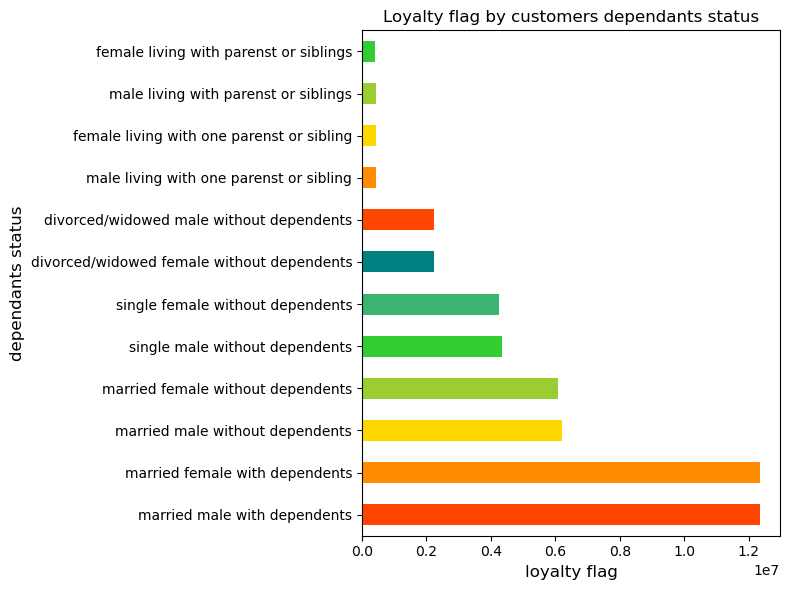

In [29]:
#Create a subset
df_1 = df_profiling[['dependants_status', 'loyalty_flag']]

# Create bar chart
dep_loyal_bar = df_1['dependants_status'].value_counts().plot.barh(color = color, figsize=(8, 6))
plt.xlabel("loyalty flag", fontsize=12)
plt.ylabel("dependants status", fontsize=12)  
plt.title("Loyalty flag by customers dependants status", fontsize=12)

# Use tight_layout to prevent label overlap
plt.tight_layout()

In [30]:
# Export the visualization it outside
dep_loyal_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'dep_loyal_bar.png'))

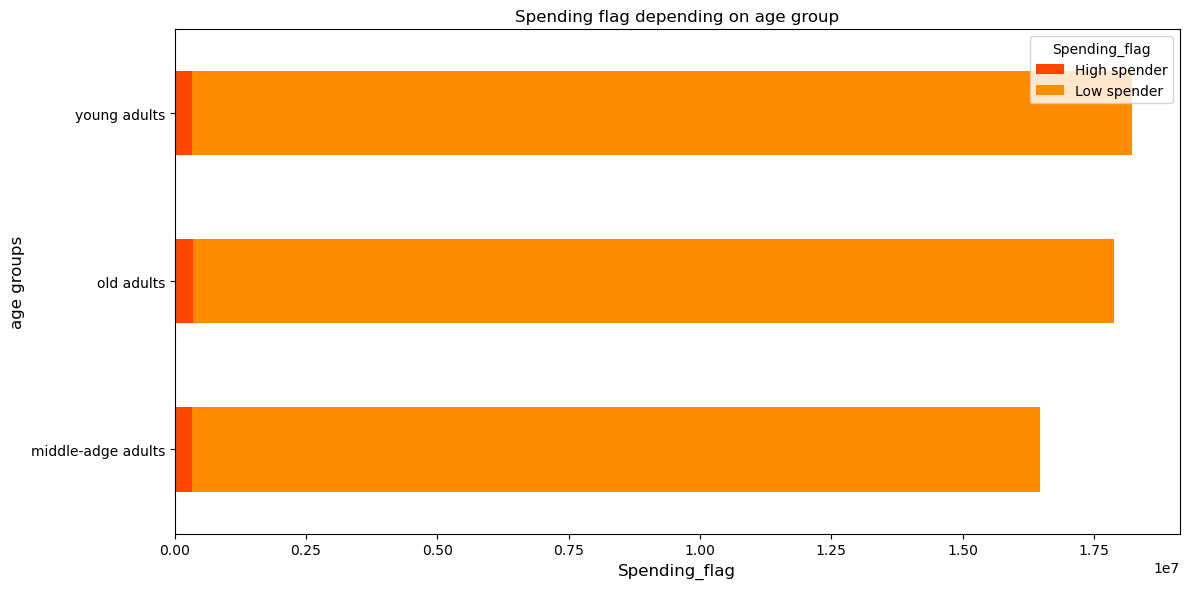

In [37]:
# Create a crosstab 
df_2 = pd.crosstab(df_profiling['age_group'], df_profiling['Spending_flag'])

# Creating a chart
df_2_bar = df_2.plot.barh(stacked = True, color = color, figsize=(12, 6))


plt.xlabel('Spending_flag', fontsize=12)
plt.ylabel('age groups', fontsize=12)
plt.title("Spending flag depending on age group", fontsize=12)
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Adjust the layout to prevent the bottom part from getting cut off
plt.tight_layout()

In [38]:
# Export the visualization it outside
df_2_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'df_2_bar.png'))

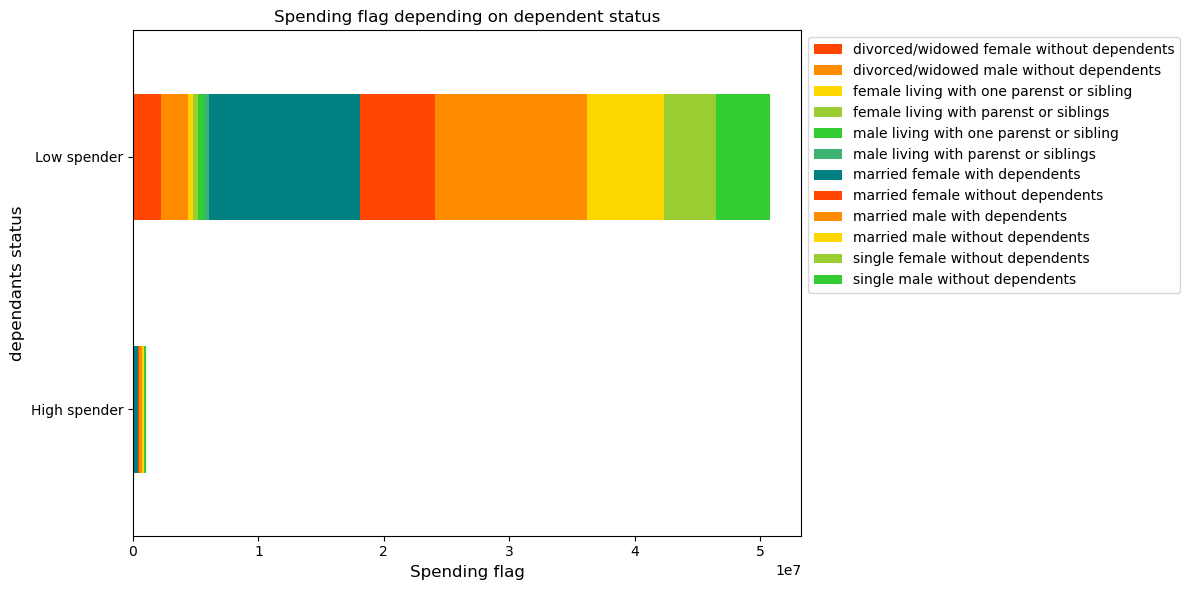

In [34]:
# Create a crosstab 
df_profiling_dep_spen = pd.crosstab(df_profiling['Spending_flag'], df_profiling['dependants_status'])

# Creating a chart
df_profiling_dep_spen_bar = df_profiling_dep_spen.plot.barh(stacked = True, color = color, figsize=(12, 6))

plt.xlabel('Spending flag', fontsize=12)
plt.ylabel('dependants status', fontsize=12)
plt.title("Spending flag depending on dependent status", fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust the layout to prevent the bottom part from getting cut off
plt.tight_layout()

# Show the plot
plt.show()

In [35]:
# Export the visualization it outside
df_profiling_dep_spen_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'df_profiling_dep_spen_bar.png'))

In [42]:
# Create a crosstab
df_price_rang_loy = pd.crosstab(df_profiling['price_range_loc'], df_profiling['loyalty_flag'])

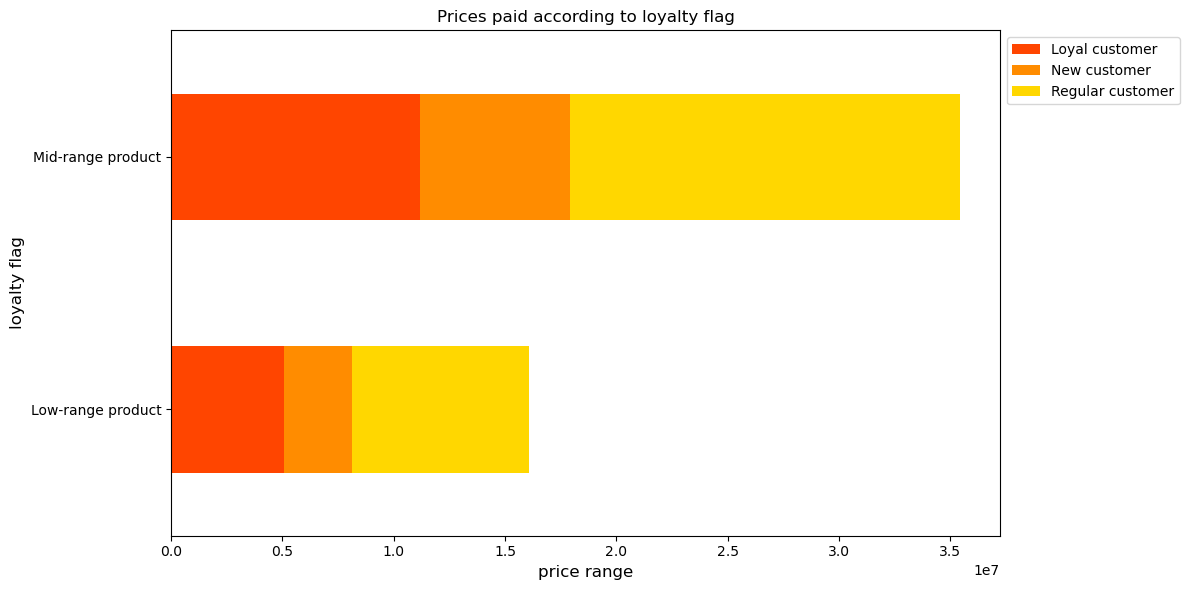

In [43]:
# Creating a chart
df_price_rang_loy_bar = df_price_rang_loy.plot.barh(stacked = True, color = color, figsize=(12, 6))

plt.xlabel('price range', fontsize=12)
plt.ylabel('loyalty flag', fontsize=12)
plt.title("Prices paid according to loyalty flag", fontsize=12)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Adjust the layout to prevent the bottom part from getting cut off
plt.tight_layout()

# Show the plot
plt.show()

In [44]:
# Export the visualization it outside
df_price_rang_loy_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'df_price_rang_loy_bar.png'))

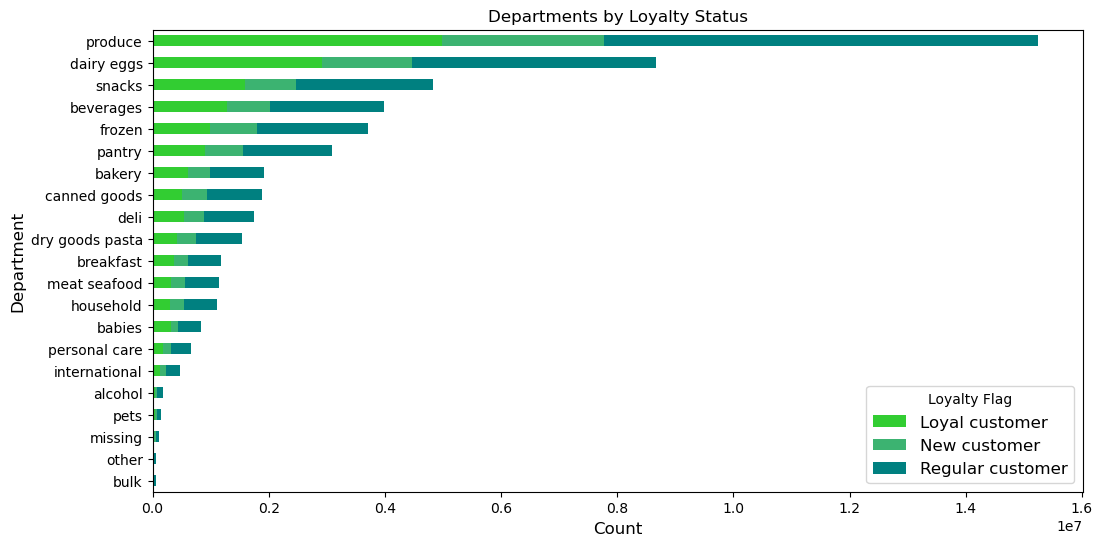

In [50]:
# Group departments and loyalty flag
depar_loyalty = df_profiling.groupby(['department', 'loyalty_flag']).size().unstack()

# Sort
depar_loyalty = depar_loyalty.loc[depar_loyalty.sum(axis=1).sort_values(ascending=True).index]

# Create bar chart
bar_dep_loyalty = depar_loyalty.plot.barh(stacked=True, color=["limegreen", "mediumseagreen", "teal"], figsize=(12, 6))

plt.title("Departments by Loyalty Status", fontsize=12)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Department", fontsize=12)

plt.legend(title="Loyalty Flag", loc='lower right', fontsize=12)

# Show the plot
plt.show()

In [51]:
# Export the visualization it outside
bar_dep_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dep_loyalty.png'))

In [65]:
# Subset and count column product name
df_top_5_prod = df_profiling[['product_name', 'Spending_flag', 'price_range_loc' ]]

In [66]:
df_top_5_prod.head()

,product_name,Spending_flag,price_range_loc
0,Granny Smith Apples,Low spender,Mid-range product
1,Blueberries,Low spender,Mid-range product
2,Shredded Sharp Cheddar Cheese,Low spender,Mid-range product
3,Smoked Paprika,Low spender,Mid-range product
4,Coarse Kosher Salt,Low spender,Mid-range product


In [89]:
# Output check
top_10_prod = df_top_5_prod.value_counts('product_name')
#Show
top_10_prod

product_name
Banana                                       697844
Bag of Organic Bananas                       543785
Organic Strawberries                         419625
Organic Baby Spinach                         377637
Organic Hass Avocado                         346044
                                              ...  
Hops Hard Apple Cider                             1
Chocolate Crunchy Seven Nut & Seed Butter         1
Rose & Apricot Antioxidant Day Creme              1
Light Whipped Topping                             1
American Blend                                    1
Name: count, Length: 48421, dtype: int64

In [90]:
top_10_prod.head(10)

product_name
Banana                    697844
Bag of Organic Bananas    543785
Organic Strawberries      419625
Organic Baby Spinach      377637
Organic Hass Avocado      346044
Organic Avocado           280036
Large Lemon               251522
Limes                     240099
Organic Raspberries       227974
Strawberries              211259
Name: count, dtype: int64

In [92]:
df_10 = top_10_prod.head(10)

In [103]:
# Output check
df_10.info

<bound method Series.info of product_name
Banana                    697844
Bag of Organic Bananas    543785
Organic Strawberries      419625
Organic Baby Spinach      377637
Organic Hass Avocado      346044
Organic Avocado           280036
Large Lemon               251522
Limes                     240099
Organic Raspberries       227974
Strawberries              211259
Name: count, dtype: int64>

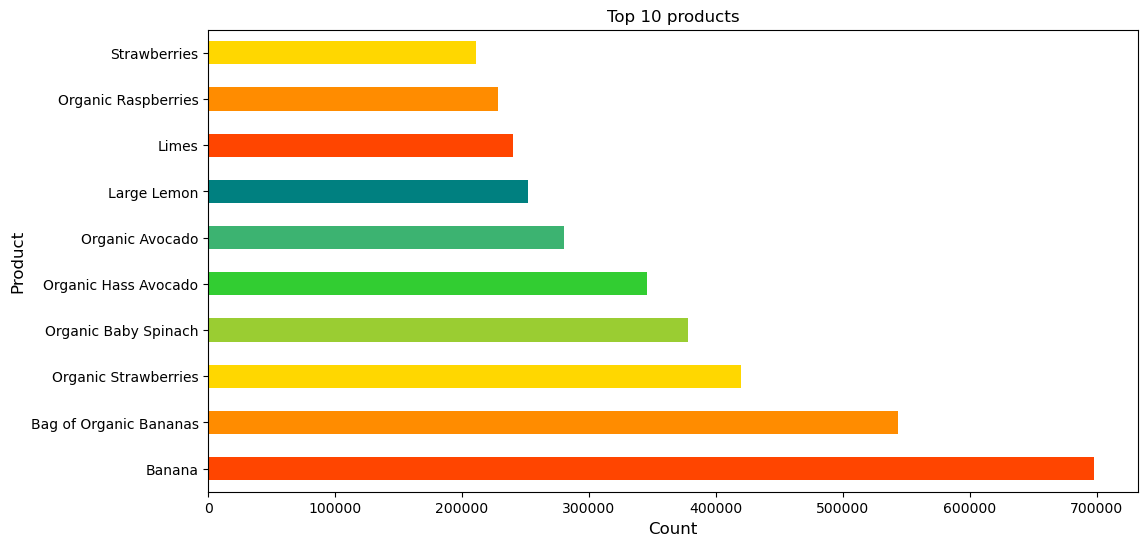

In [105]:
# Create a horizontal bar chart
df_10_bar = df_10.plot.barh(x='product_name', y='count', color=color, figsize=(12, 6))

plt.title("Top 10 products", fontsize=12)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Product", fontsize=12)

# Show the plot
plt.show()

In [106]:
# Export the visualization it outside
df_10_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'df_10_bar.png'))

In [ ]:
# Export last dataframe
df_profiling.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_profiling.pkl'))